In [1]:
 #Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set(style="whitegrid", palette="muted")

In [3]:
#Load Cleaned Nigeria Dataset

df = pd.read_csv("cleaned_global_terrorism.csv")

# Ensure 'iyear' exists
if 'iyear' not in df.columns:
    df['iyear'] = pd.to_datetime(df['date']).dt.year

# Create folder to store plots
os.makedirs("nigeria_terrorism_reports", exist_ok=True)



C:\Users\ncc5444\AppData\Local\Temp\ipykernel_8996\1549257127.py:3: DtypeWarning: Columns (3,5,29,31,56,57,58,71,74,84,86,88,90,108,109,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_global_terrorism.csv")


Define Presidents & Eras (1976–2017)

In [4]:
presidents = [
    ("Olusegun Obasanjo (Military)", 1976, 1979),
    ("Shehu Shagari", 1979, 1983),
    ("Muhammadu Buhari (Military)", 1983, 1985),
    ("Ibrahim Babangida", 1985, 1993),
    ("Ernest Shonekan", 1993, 1993),
    ("Sani Abacha", 1993, 1998),
    ("Abdulsalami Abubakar", 1998, 1999),
    ("Olusegun Obasanjo (Democratic)", 1999, 2007),
    ("Umaru Musa Yar’Adua", 2007, 2010),
    ("Goodluck Jonathan", 2010, 2015),
    ("Muhammadu Buhari (Democratic)", 2015, 2017)
]
pres_df = pd.DataFrame(presidents, columns=["President", "Start", "End"])

Terrorism Trend Plot by Year with Presidential Ruling Terms

In [5]:
plt.figure(figsize=(14,6))
yearly_attacks = df.groupby('iyear').size()
plt.plot(yearly_attacks.index, yearly_attacks.values, color='firebrick', linewidth=2)
plt.title('Terrorist Attacks in Nigeria (1976–2017)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

# Add shaded presidential eras
for _, row in pres_df.iterrows():
    plt.axvspan(row['Start'], row['End'], alpha=0.15)
    plt.text((row['Start']+row['End'])/2, plt.ylim()[1]*0.9, 
             row['President'].split('(')[0].strip(),
             ha='center', fontsize=8, rotation=90)

plt.tight_layout()
plt.savefig("nigeria_terrorism_reports/attacks_by_year_presidents.png", dpi=300)
plt.close()

Attack Types Distribution

In [6]:
if 'attacktype1_txt' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y='attacktype1_txt', order=df['attacktype1_txt'].value_counts().index, color='steelblue')
    plt.title('Types of Terrorist Attacks in Nigeria (1976–2017)')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Attack Type')
    plt.tight_layout()
    plt.savefig("nigeria_terrorism_reports/attack_types.png", dpi=300)
    plt.close()

Fatalities Trend Over Time

In [7]:
if 'nkill' in df.columns:
    plt.figure(figsize=(14,6))
    fatality_trend = df.groupby('iyear')['nkill'].sum()
    plt.plot(fatality_trend.index, fatality_trend.values, color='crimson', linewidth=2)
    plt.title('Total Fatalities from Terrorist Attacks (1976–2017)')
    plt.xlabel('Year')
    plt.ylabel('Fatalities')
    for _, row in pres_df.iterrows():
        plt.axvspan(row['Start'], row['End'], alpha=0.15)
    plt.tight_layout()
    plt.savefig("nigeria_terrorism_reports/fatalities_by_year.png", dpi=300)
    plt.close()

Top 10 Cities Affected In Nigeria Based on GTD Reports

In [8]:
if 'city' in df.columns:
    plt.figure(figsize=(10,6))
    df['city'].value_counts().head(10).plot(kind='bar', color='darkgreen')
    plt.title('Top 10 Most Affected Cities in Nigeria')
    plt.xlabel('City')
    plt.ylabel('Number of Attacks')
    plt.tight_layout()
    plt.savefig("nigeria_terrorism_reports/top_10_cities.png", dpi=300)
    plt.close()

Weapon Types

In [9]:
if 'weaptype1_txt' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y='weaptype1_txt', order=df['weaptype1_txt'].value_counts().index, color='darkorange')
    plt.title('Weapons Used in Terrorist Attacks')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Weapon Type')
    plt.tight_layout()
    plt.savefig("nigeria_terrorism_reports/weapon_types.png", dpi=300)
    plt.close()

Computing of Success vs Failure Rate

In [10]:
if 'success' in df.columns:
    plt.figure(figsize=(6,5))
    df['success'].replace({0:'Failed', 1:'Successful'}).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['salmon','lightgreen'])
    plt.title('Attack Success vs Failure in Nigeria')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig("nigeria_terrorism_reports/success_rate.png", dpi=300)
    plt.close()

Export President–Crime Comparison Data (for further analysis) for  Nigeria Security Architecture

In [12]:
# Count total attacks per administration
era_stats = []
for _, row in pres_df.iterrows():
    attacks = df[(df['iyear'] >= row['Start']) & (df['iyear'] <= row['End'])].shape[0]
    fatalities = df[(df['iyear'] >= row['Start']) & (df['iyear'] <= row['End'])]['nkill'].sum()
    era_stats.append([row['President'], row['Start'], row['End'], attacks, fatalities])

era_df = pd.DataFrame(era_stats, columns=['President', 'Start_Year', 'End_Year', 'Total_Attacks', 'Total_Fatalities'])
era_df.to_csv("nigeria_terrorism_reports/presidents_vs_terrorism.csv", index=False)

print("All visual reports and data exported to 'nigeria_terrorism_reports' folder successfully!")

All visual reports and data exported to 'nigeria_terrorism_reports' folder successfully!


Plot Presidents vs Total Attacks

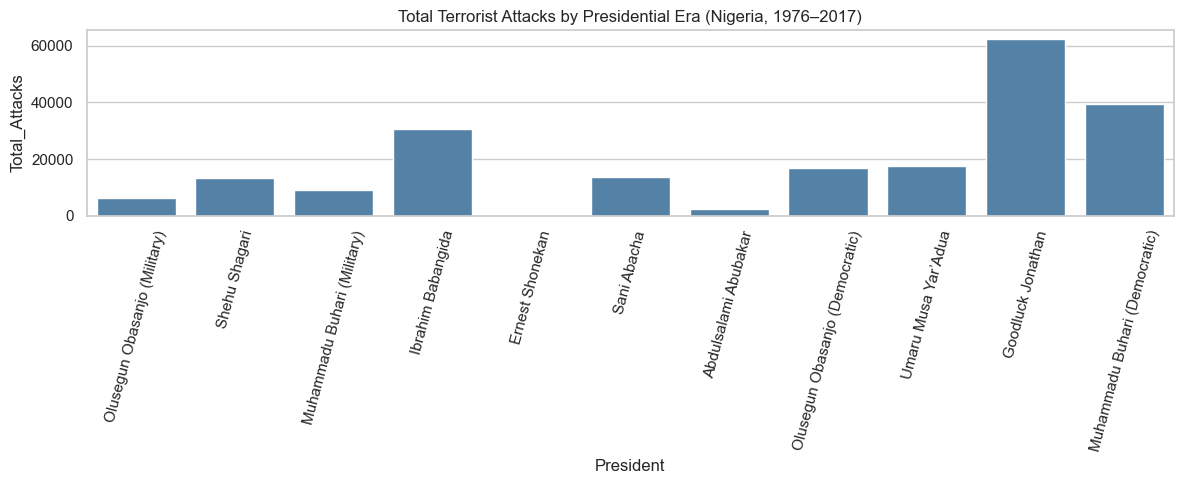

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(data=era_df, x='President', y='Total_Attacks', color='steelblue')
plt.xticks(rotation=75)
plt.title('Total Terrorist Attacks by Presidential Era (Nigeria, 1976–2017)')
plt.tight_layout()
plt.show()
